# **Latar Belakang Project**

Perusahaan di bidang Supermarket, - ingin menganalisa terkait kondisi di perusahaan. Dimana perusahaan ingin identifikasi terkait dengan :
- Segmen pelanggan, dimana mengelompokan pelanggan berdasarkan variabel (produk yang dibeli, umur, status, dll)
- Pengeluaran Pelanggan, pada masing-masing produk yang ingin dibeli
- Pendapatan pelanggan, dengan analisis pendapatn/tahun
- Aktivitas promosi, analisis efektifitas peran promosi yang dilakukan
- Aktivitas clossing/pembelian pelanggan, hal ini bisa dilihat dari sistem saluran yang dipilih dan jumlah kunjungan website

# **DATABASES**
Data penunjang dari analisa ini diambil dari Supermarket Customer Data Dictionary (PURWADHIKA)
Dimana hal pertama yang dilakukan adalah import data sesuai dengan kebutuhan dari analisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

# **Datasheet** 
Isi datasheet pada data memuat beberapa informasi yang dapat dijadikan bahan referensi sekaligus dijadikan acuan dalam mengolah data, diantaranya :
- Id pelanggan, sebagai identitas data pelanggan
- Year_Birth, sebagai tahun kelahiran pelanggan
- Education, background pendidikan 
- Marital_Status, status pernikahan
- Income, pendapatan pelanggan
- Kidhome, Jumlah anak pelanggan
- Teenhome, jumlah remaja dirumah pelanggan
- Dt_Customer, data tanggal pendaftaran pelanggan 
Recency, jumlah hari sejak pembelian terakhir
● Complain, 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

In [2]:
df=pd.read_csv('Supermarket_Customers.csv')

print(df.head())

  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                                                      

In [3]:
file_path = "Supermarket_Customers.csv"
df = pd.read_csv(file_path, sep='\t')
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [4]:
print(df.tail())

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0    

In [5]:
df.shape

(2240, 29)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.isna().sum() #menhitung jumlah nilai (0) pada data untuk identifikasi missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
#Hitung proporsi prosentase data missing value dengan 100 untuk mendapatkan persentase nilai yang hilang di setiap kolom
missing = df.isnull().sum()/len(df)*100
print("Missing values per column:")
print(missing)

Missing values per column:
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64


## **Identifikasi Missing value**
Identifikasi terkait data yang hilang atau bernilai (0/kosong). Sehingga apabila data diolah bisa sesuai dengan standart data lainnya

In [10]:
## Mengisi missing values pada kolom 'Income' dengan nilai 0 
df['Income'].fillna(0, inplace=True)

In [11]:
#Verikfikasi ulang Missing Value
missing_values_after = df.isnull().sum()
print("\nMissing values per column setelah perbaikan:")
print(missing_values_after)


Missing values per column setelah perbaikan:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [12]:
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

## **Identifikasi Outlier**
Digunakan sebagai identifikasi data anomali/data berbeda dalam suatu databases. Outlier dapat memberikan wawasan tentang distribusi data. Kehadiran outlier dapat menunjukkan bahwa data tidak mengikuti distribusi normal atau mungkin ada subpopulasi dalam dataset yang penting untuk dipelajari secara terpisah

count      2240.000000
mean      51687.459375
std       25609.342730
min           0.000000
25%       34722.000000
50%       51075.000000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


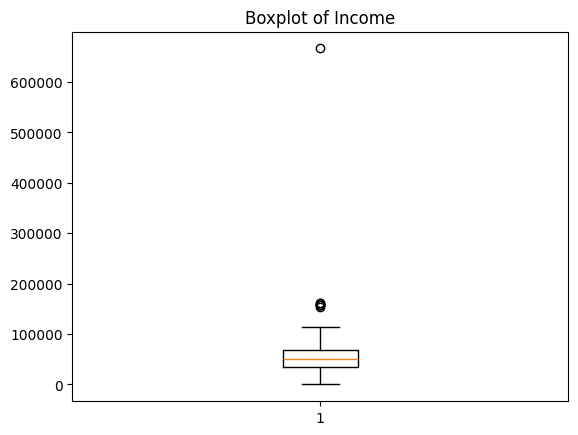

In [13]:
# Descriptive statistics
print(df['Income'].describe())

# Boxplot untuk visualisasi outliers
plt.boxplot(df['Income'])
plt.title('Boxplot of Income')
plt.show()

In [83]:
Q1 = df['Income'].quantile(0.25) #nilai 1/4 bagian bawah
Q3 = df['Income'].quantile(0.75) #nilai 1/4 bagian atas
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print("Outliers:")
print(outliers)

# Menghapus outliers
df_no_outliers = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

Outliers:
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
164          1  2014-03-01       98        20  ...                  0   
617          1  2013-06-03       31        85  ...                  1   
655          0  2014-02-07       81         1  ...                  0   
687          0  2012-08-04       21     

## **Identifikasi Data Formating**
Digunakan sebagai identifikasi pengecekan tipe data, serta bisa digunakan sebagai konversi tipe data supaya seragam. Dalam konteks ini digunakan validitasi terhadap kategori format tanggal "YYYY-MM-DD" atau "DD-MM-YYYY

In [18]:
# Cek tipe data
print(df.dtypes)

# Contoh format tanggal, mengubah kolom 'Dt_Customer' ke datetime dengan dayfirst=True
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')
print(df['Dt_Customer'])

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-

## **Identifikasi Data Duplikat**
Digunakan sebagai identifikasi terkait data ganda dalam dataframe. Sehingga apabila ditemukan data ganda maka akan dihapus supaya olah data valid. 

In [19]:
# Cek data duplikat
duplicates = df.duplicated()
print("Data duplikat:")
print(df[duplicates])

Data duplikat:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


In [20]:
# Menghapus data duplikat
df_no_duplicates = df.drop_duplicates()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## **ANALYSIS DATA**

Pada analisis ini dilakukan analisis terhadap 5 komponen meliputi :
1. Demografi Pelanggan (Distribusi umur pelanggan, status pernikahan dan Tingkat Pendidikan)
2. Pendapaan dan Kondisi Rumah Tangga
3. Pengeluaran Pelanggan (Spesifikasi produk tertentu)
4. Aktivitas Promosi (Tingkat penerimaan Kampanye)
5. Aktivitas Pembelian (Jumlah pembelian pada sluran tertentu dan jumlah kunjungan website dalam sebulan terakhir)



## **Demografi Pelanggan**

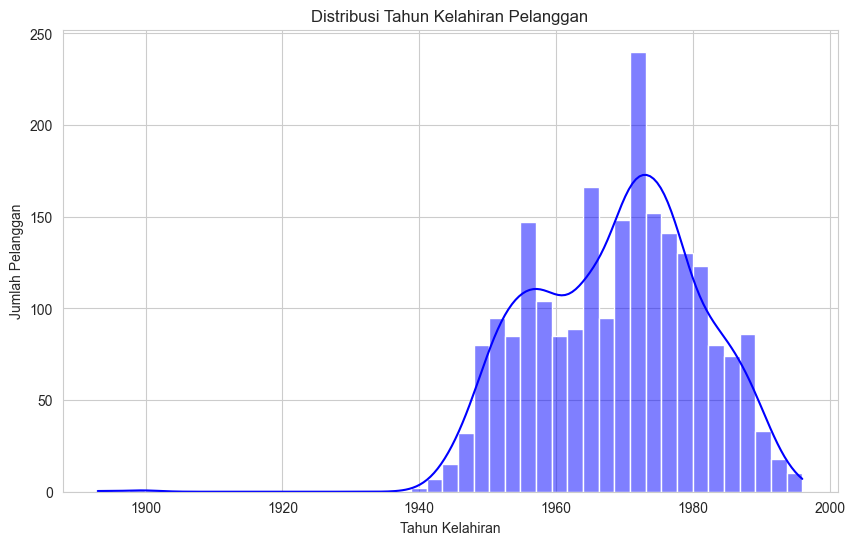

In [52]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid') 
sns.histplot(df['Year_Birth'], bins=45, kde=True, palette='deep', color='b')

plt.title('Distribusi Tahun Kelahiran Pelanggan')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## Interpretasi Grafik
Hasil dari grafik menunjukan data jumlah pelanggan berdasarkan tahun kelahiran mereka. Dimana puncak distribusi pelanggan berada pada tahun kelahiran 1960-an. Hal ini menunjukan bahwa sebagian besar pelanggan lahir pada periode tersebut. Apabila dikaitkan dengan tren, sebelum tahun 1940 jumlah pelanggan yang lahir cukup rendah dan meningkat secara bertahap. Hal ini berbeda dengan kelahiran dari tahun 1940-an hingga 1960-an, jumlah pelanggan meningkat tajam, menunjukkan tren kelahiran yang meningkat selama periode ini.
Setelah puncak di tahun 1960-an, terdapat penurunan tajam dalam jumlah kelahiran, yang berlanjut hingga sekitar tahun 1980-an, kemudian sedikit stabil sebelum menurun lagi setelah tahun 1990.

## Strategi
- Produk dan layanan bisa disesuaikan untuk lebih relevan dengan kelompok umur ini (1940-1980 an)
- Menyesuaikan produk sesuai kebutuhan umur seperti, alat kesehatan, kebutuhan ortu dll


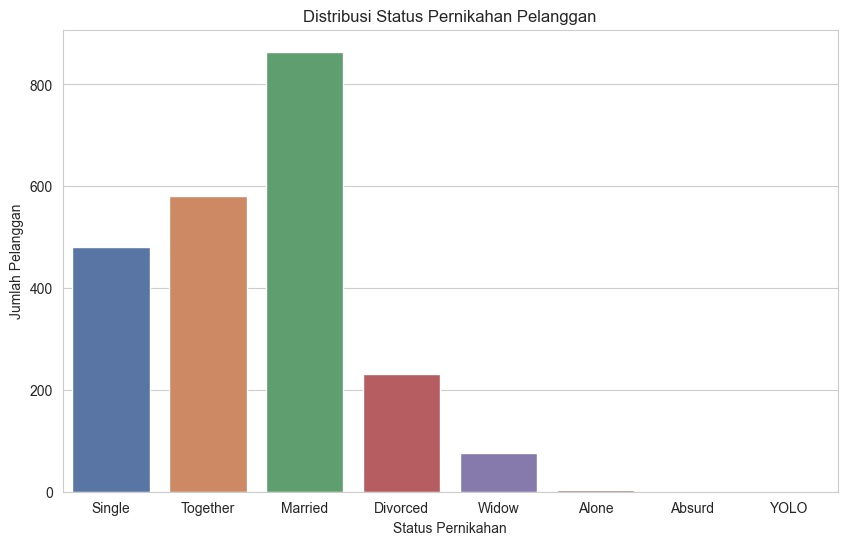

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', palette='deep')
plt.title('Distribusi Status Pernikahan Pelanggan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Pelanggan')
plt.show()


## Interpretasi Grafik
Hasil dari analisa, didapatkan bahwa ada 5 kategori dari 8 kategori yang memiliki prosentase tertinggi. Kategori status pernikahan tertinggi yaitu : Married (+- 800 pelanggan), Together (+-580 pelanggan), Single (+- 480 pelanggan), Divorced (+- 250 pelanggan), dan widow (+- 100 an pelanggan). Sehingga dalam konteks ini, seharusnya perusahaan mampu mengelompokan barang yang dijual sesuai dengan status kebutuhan sosial

## Strategi
- Membuat dan mengembangkan produk atau layanan khusus untuk pelanggan yang menikah atau bersama, seperti paket keluarga, promosi pasangan, dll. Hal ini bisa dibuktikan dengan kartu keluarga atau hal lainnya yang memungkinkan bisa diverifikasi. sehingga menarik daya minat pelanggan

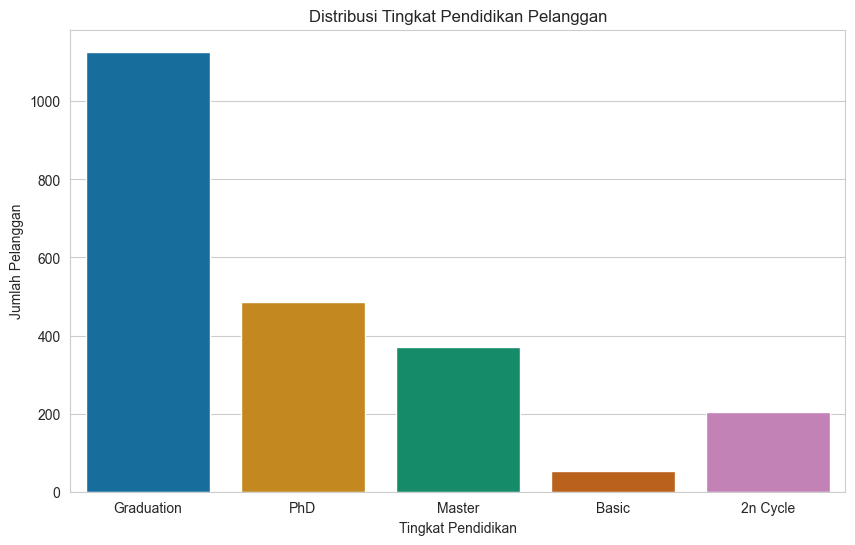

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', palette='colorblind')
plt.title('Distribusi Tingkat Pendidikan Pelanggan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

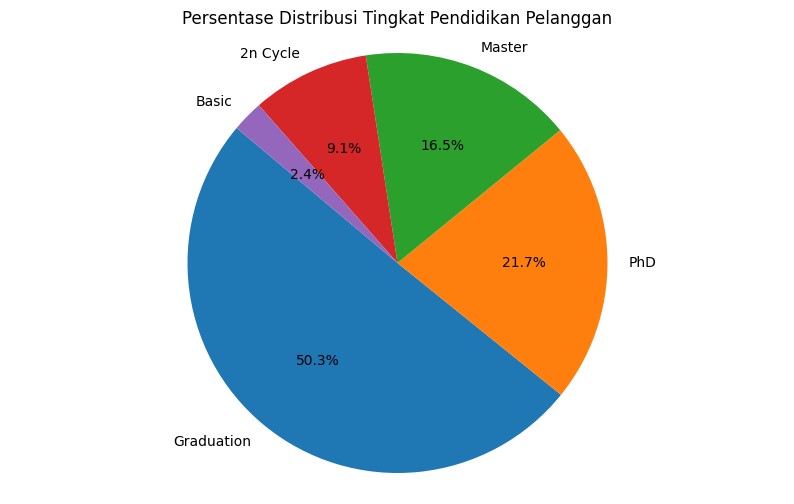

In [38]:
# Hitung jumlah data untuk setiap tingkat pendidikan
edu_counts = df['Education'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Distribusi Tingkat Pendidikan Pelanggan')
plt.axis('equal')  # Memastikan diagram lingkaran menjadi lingkaran, bukan oval
plt.show()

## Interpretasi Grafik
Hasil analisa menunjukan olah data ada hubungan tingkat pendidikan terhadap jumlah pelanggan. Hasil analisa mengungkapkan bahwa terdap 5 kategori tingkat pendidikan dari latar belakang pelanggan. Hal ini menunujuka bahwa pelanggan dengan latar belakang pendidikan (graduation) memiliki tingkat peling tinggi yaitu sebesar 50.3% dan disusul tingkat pendidikan (phd) dengan prosentase 21.7%, dilanjut dengan pendidikan master, 2n cycle, dan basic. Dari hal ini bisa diketahui bahwa tren pelanggan menunjukan pendidikan tertinggi berpengaruh terhadap jumlah pelanggan yang belanja pasa supermarket, sehingga perlu adanya bahan/keperluan yang menunjang pelanggan untuk beli dari segi pendidikan.

## Strategi
- Memfokuskan barang jual pada pelanggan dengan latar belakang pendidikan tinggi (alat kantor, dll)
- Memperluas segmen pelanggan pada latar belakang pendidikan tingkat bawah untuk menumbuhkan kesdaran beli pada kebutuhan yang diinginkan
- Edukasi dan pengembangan produk inovasi berbasis teknologi yang disesuaikan dengan tren kebutuhan pendidikan

## **Pendapatan dan Kondisi Rumah Tangga**

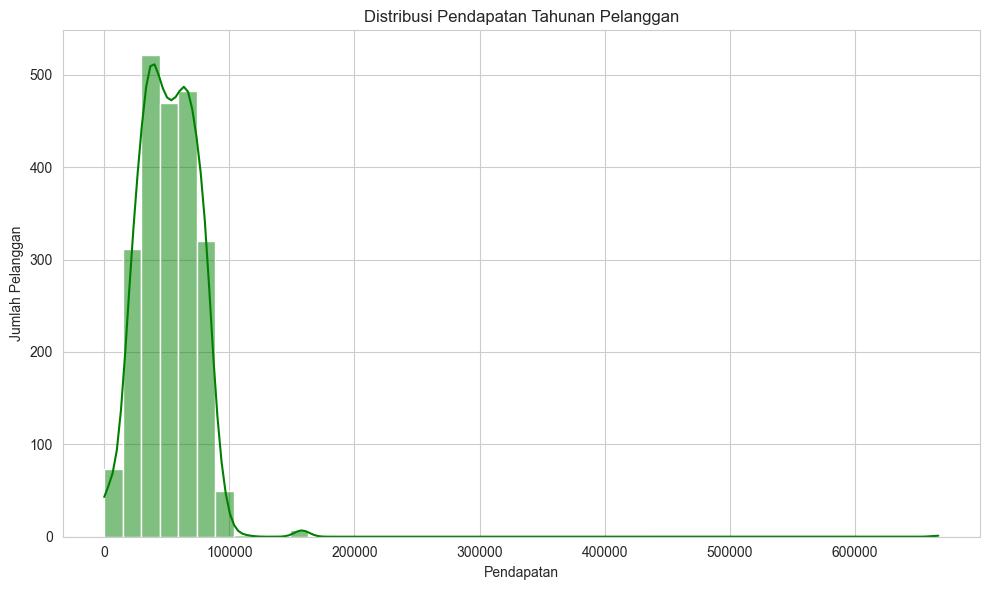

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=45, kde=True, palette='deep', color='g')
plt.title('Distribusi Pendapatan Tahunan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

## Interpretasi Grafik
Hasil analisa menjukan hubungan jumlah pendapat terhadap jumlah pelanggan. Hasil analisa menunjukan sebagian besar pelanggan mempunyai pendapatan tahunan berkisar 50.000 - 100.000, Akan tetapi pada data menampilkan ada beberapa pelanggan mempunyai pendapatan diatas rata-rata pelanggan lainnya, berkisar >200.000. Sehingga pada kasus ini perusahaan perlu menyesuaikan penjualan produk yang disesuaikan dengan ekonomi pelanggan secara umum

## Strategi
- Memilih dan mengembangkan produk disesuaikan dengan kondisi rata-rata perekonomian income pelanggan. Hal ini bisa dilakukan dengan memilih barang yang lebih relatif terjangkau

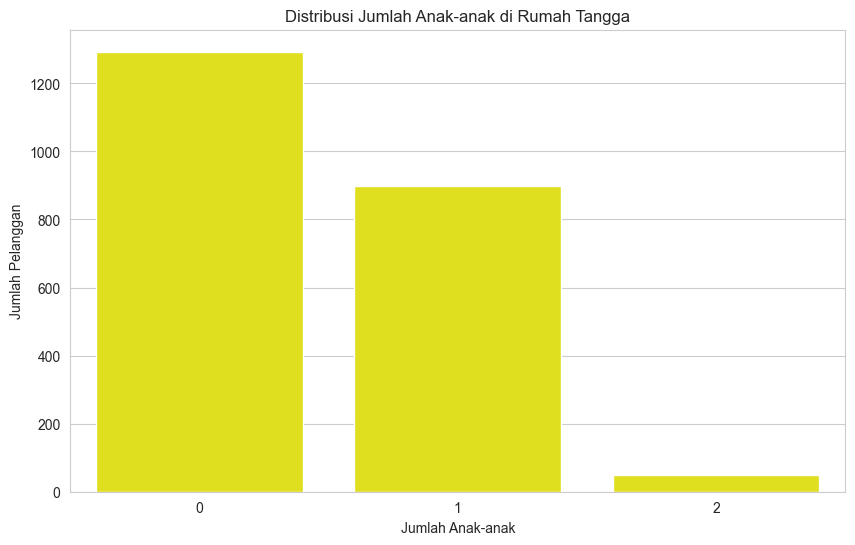

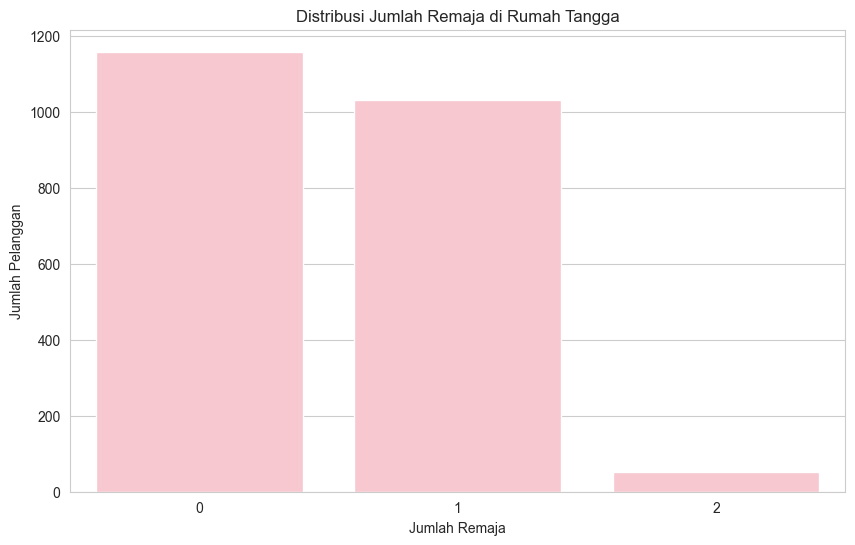

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Kidhome', color='yellow' )
plt.title('Distribusi Jumlah Anak-anak di Rumah Tangga')
plt.xlabel('Jumlah Anak-anak')
plt.ylabel('Jumlah Pelanggan')
plt.show()

#REMAJA
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Teenhome', color='pink')
plt.title('Distribusi Jumlah Remaja di Rumah Tangga')
plt.xlabel('Jumlah Remaja')
plt.ylabel('Jumlah Pelanggan')
plt.show()


## Interpretasi Grafik
Hasil analisa grafik menunjukan 3 kategori dalam distribusi jumlah anak pelanggan. hasil tertinggi dengan jumlah +- 1200 pelanggan menyatakan tidak mempunyai anak, sedangkan pelanggan dengan jumlah +- 850 menyatakan memiliki anak 1 dan jumlah anak 2 dengan rentan jumlah pelanggan +-80 orang. Hal ini bisa dianalogikan bahwa sebagian besar pelanggan tidak memiliki anak dirumah (terlepas status single atau berkeluarga). Hal ini sama dengan kondisi pada tren jumlah pelanggan yang memiliki anak usia remaja

## Strategi
- Hasil produk atau layanan yang ditargetkan untuk individu atau pasangan tanpa anak dirasa lebih efektif
- menawarkan barang yang bersifat individual/ barang dewasa sehingga penjualan lebih fokus

## **Pengeluaran Bulanan Pelanggan**
untuk melihat distribusi pengeluaran pelanggan pada berbagai produk (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds).

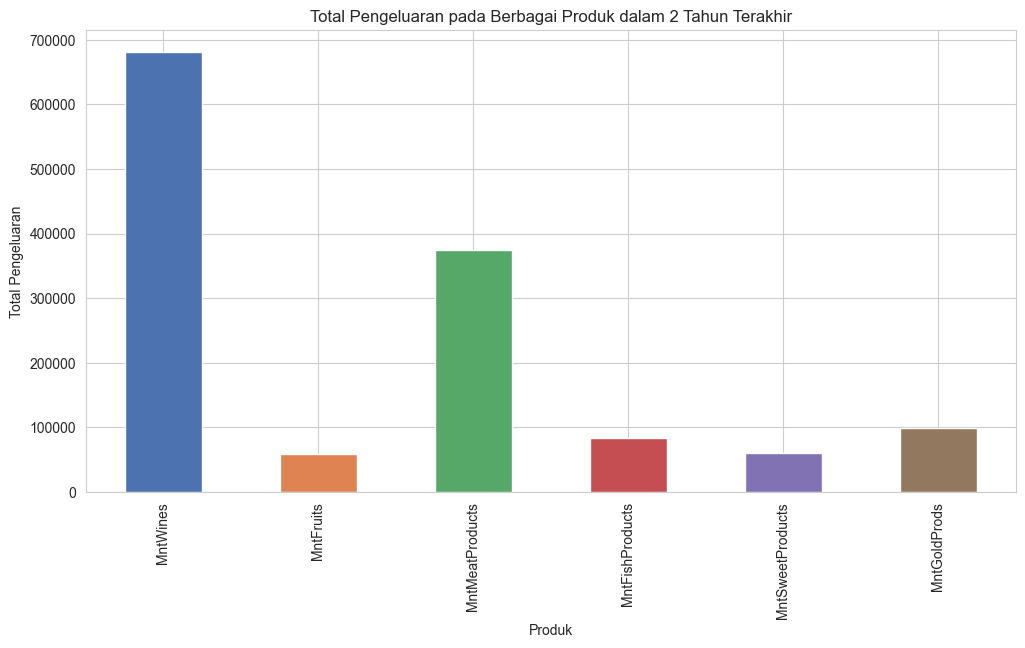

In [73]:
palette = sns.color_palette('deep')
plt.figure(figsize=(12, 6))
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[product_cols].sum().plot(kind='bar', color= palette)
plt.title('Total Pengeluaran pada Berbagai Produk dalam 2 Tahun Terakhir')
plt.xlabel('Produk')
plt.ylabel('Total Pengeluaran')
plt.show()


## Interpretasi Grafik
Hasil analisa pada grafik terhadap jenis produk yang sering dibeli oleh pelanggan. Hasil menyatakan bahwa, produk wines memiliki tingkat penjualan sebesar 600.000, meat product sebesar 300.000, gold product sebesar 200.00, sweet product sebesar 150.000, dan fruit product sebesar 100.000. HAsil data menunjukan kecenderungan Pelanggan menghabiskan lebih banyak pada produk anggur dan daging, yang mungkin menunjukkan preferensi terhadap barang-barang mewah atau kebutuhan makanan yang esensial.

## Strategi
- Memfokuskan pada produk dengan 3-5 penjualan paling tinggi, dengan sistem varian yang lebih banyak, promo, dan juga testimoni
- Adanya branding yang dilakukan dan dikhususkan pada produk dengan penjualan paling tinggi.
- menambah varian baru pada produk yang memiliki penjualan tertinggi

## **Aktivitas Promosi**
 penerimaan kampanye oleh pelanggan (AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response).

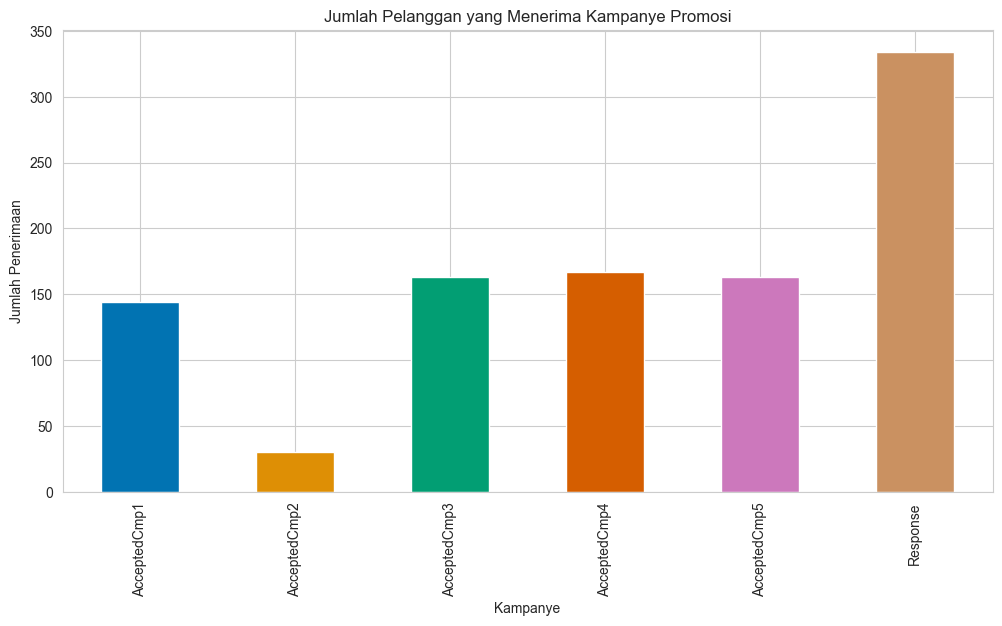

In [75]:
palette = sns.color_palette('colorblind')
plt.figure(figsize=(12, 6))
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df[campaign_cols].sum().plot(kind='bar',color= palette )
plt.title('Jumlah Pelanggan yang Menerima Kampanye Promosi')
plt.xlabel('Kampanye')
plt.ylabel('Jumlah Penerimaan')
plt.show()

## Interpretasi Grafik
Hasil analisa grafik pada hubungan jumlah pelanggan dengan penerimaan kampanye promosi pada 6 kategori didapatkan hasil data yang bervariasi. Hasi l penerimaan tertinggi terdapat pada penerimaan jenis promosi dengan item 'Response'. Hal ini bisa dianalogikan bahwa promosi ini lebih efektif dibandingkan dengan lainnya. sementara kondisi kampanye paling rendah pada posisi item 'AcceptedCmp2' sehingga pada konteks kampanye ini perlu dilakukan kajian ulang terkait efektivitas

## Strategi
- Memfokuskan dan meneruskan kampanye dengan item 'Response'
- Mengaji ulang terkait keberlanjutan pada sistem kampanye item 'AcceptedCmp2'
- Sementra item 'AcceptedCmp1, AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5' mempunyai nilai yang hampir sama. Sehingga bisa dil;akukan kolaborasi sistem diantara keempatnya


## **Aktivitas Pembeli dan Trend Pelanggan**
- Bar plot untuk melihat jumlah pembelian melalui berbagai saluran (NumWebPurchases, NumCatalogPurchases, NumStorePurchases).
- Kunjungan Website dalam sebulan terakhir

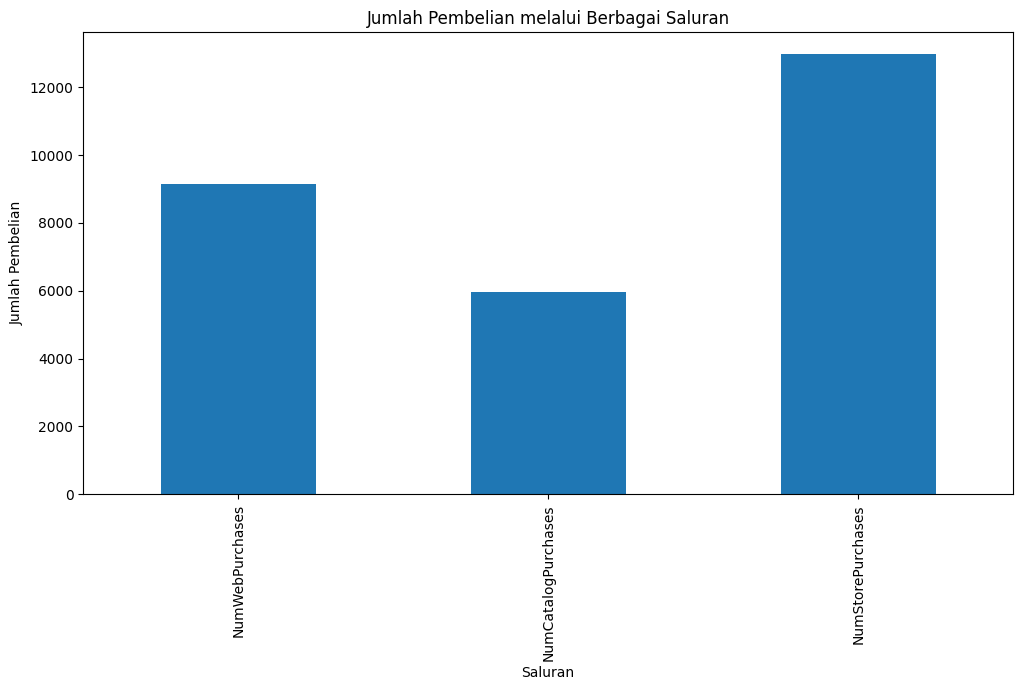

In [42]:
plt.figure(figsize=(12, 6))
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df[purchase_cols].sum().plot(kind='bar')
plt.title('Jumlah Pembelian melalui Berbagai Saluran')
plt.xlabel('Saluran')
plt.ylabel('Jumlah Pembelian')
plt.show()

## Interpretasi Grafik
HAsil analisa grafik didapatkan hasil jumlah pembelian pelanggan berdasarkan 3 saluran yang mereka lakukan, yaitu : NumWebPurchases (Pembelian Web) dengan estimasi +- 8000 pembelian. NumCatalogPurchases (Pembelian Katalog) estimasi +-5000 pembelian. Sementara, NumStorePurchases (Pembelian Toko)estimasi +- 12000 pembelian dengan posisi pembelian tertinggi. Hal ini menjukan tren pembelian tertinggi dengan datang langsung ketoko dibandingkan metode lainnya

## Strategi
- Optimalkan kepuasan pelanggan pada pembelian saat ditoko, sehingga bisa memberikan experience yang lebih dan memberika pelayanan yang baik (ramah, tempat bagus, dll)
- Mengkaji ulang terkait sistem pembelian lewat web terkait sistem kemudahan, pembayaran dan promosi sehingga memudahkanpelanggan apabila tidak bisa datang ketoko.
- Kaji ulang terkait konten katalog, shingga perlu dilakukan evaluasi untuk menarik pelanggan clossing dengan melihat katalog


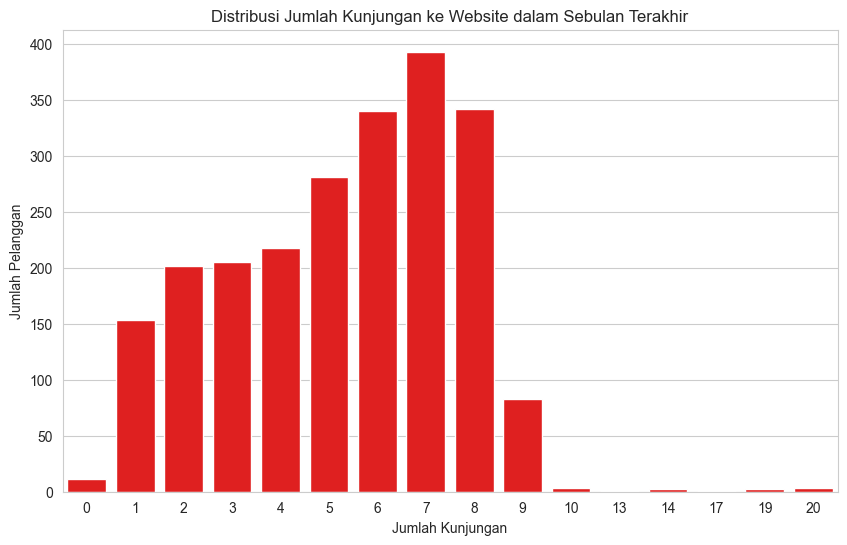

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumWebVisitsMonth', color = "red")
plt.title('Distribusi Jumlah Kunjungan ke Website dalam Sebulan Terakhir')
plt.xlabel('Jumlah Kunjungan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## Interpretasi Grafik
HAsil analisa didapatkan bahwa hubungan jumlah kunjungan pelanggan dalam 1 bulan terakhir pada website. Hasil menunjukan bahwa +- 380 orang melakukan kunjungan sebesar 7x dalam sebulan. Disusul 2 tertinggi sebesar 330 orang dengan melakukabn kunjungan sebesar 6 dan 8x. Hasil data ini menjukan perlu dilakukan optimasi kunjungan pelanggan dengan menerapkan beberapa konten menarik, promosi, dll

## Strategi
- Menguatkan konten dan branding perusahaan/toko
- Membuat konten terkait dengan manfaat dan kebutuhan pelanggan
- menggunakan databases email untuk reminder pelanbggan terkait sistem promosi atau bundling

## **KESIMPULAN DAN SARAN APLIKASI STRATEGI**
**Kesimpulan**
- Rata-rata pelanggan mempunyai pendapatan pertahun berkisar 500.00-100.00
- Sebagian besar pelanggan berstatus (Married dan Together)
- Tingkat pendidkan dari latar belakang pendidikan pelanggan sebagian besar adalah tingkat (graduation)
- Jumlah anak dan remaja rata-rata pelanggan adalah tidak mempunyai anak
- Pengeluaran produk tertinggi yang dibeli pelanggan adalah (Wines, Meat product, gold product)
- Penerimaan kampanye dirasa paling efektif berada pada (datang ketoko)
- Kunjugan website, rata-rata pelanggan melakukan kunjungan dalam 1 bulan 5-8 x

**Saran Aplikasi Strategi**
- Memfokuskan kampanye produk dengan sistem "Response' dan melakukan branding pada produk dengan penjualan tertinggi (wines)
- Meningkatkan experience pelanggan pada website dengan menambah fitur yang membantu kemudahan, ketertarikan brending produk dan updat promosi
- Pengembangan produk yang lebih difokuskan pada later belakang pendidikan dan pendapatan rata-rata pelanggan
- Adanya evaluasi yang didapatkan dari feadback experience pelanggan yang bisa dilakuka dengan metoide SERVQUAL Servis Quality
